<a href="https://colab.research.google.com/github/zahra-sharifzadeh/pytorch/blob/main/03_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Copmuter vision library
* `torchvision`
* `torchvision.datasets`: get datasets
* `torchvision.models`: get pretrained models
* `torchvision.transforms`: function for manipulating your vision data
* `torch.utils.data.Dataset` : Base dataset class for PyTorch
* `torch.utils.data.DataLoader`: Creates a python iterable over a datasets


In [4]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplot
import matplotlib.pyplot as plt

# Check Versions
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


##1. Getting a dataset
Fashion MNIST

In [7]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",# where to download the datasets
    train=True,# do we want the taining datasets
    download=True, # do we want to download the datasets
    transform=ToTensor(), # transform data to tensor
    target_transform=None #  transform the labels
)

test_data = datasets.FashionMNIST(
    root="data",# where to download the datasets
    train=False,# do we want the taining datasets
    download=True, # do we want to download the datasets
    transform=torchvision.transforms.ToTensor(), # transform data to tensor
    target_transform=None #  transform the labels
)

In [8]:
len(train_data), len(test_data)

(60000, 10000)

In [10]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [11]:
# See the training data
img , label = train_data[0]
img , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [13]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [15]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [16]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [18]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [20]:
# Check the shape
print(f"Shape of image: {img.shape}")
print("label:", label)

Shape of image: torch.Size([1, 28, 28])
label: 9


### 1.2 Visualizing our data

image shape: torch.Size([28, 28, 1])


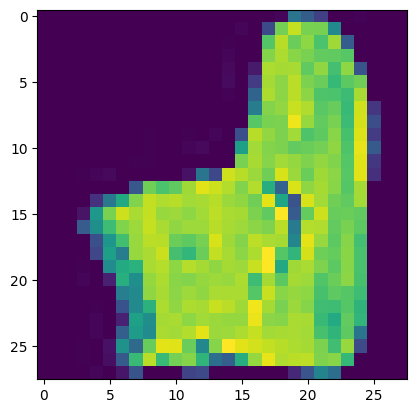

In [26]:
image, label = train_data[0]
print(f"image shape: {image.T.shape}")
plt.imshow(image.T)

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

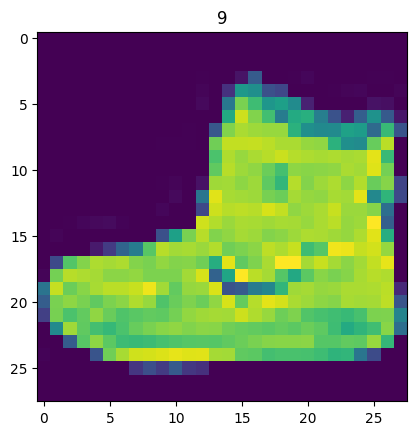

In [30]:
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

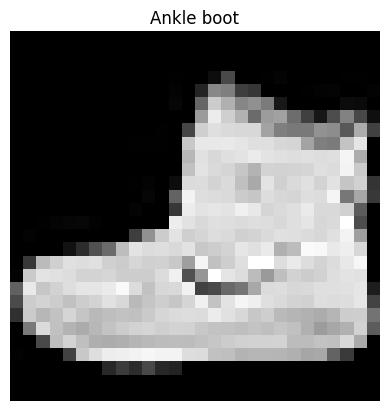

In [35]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

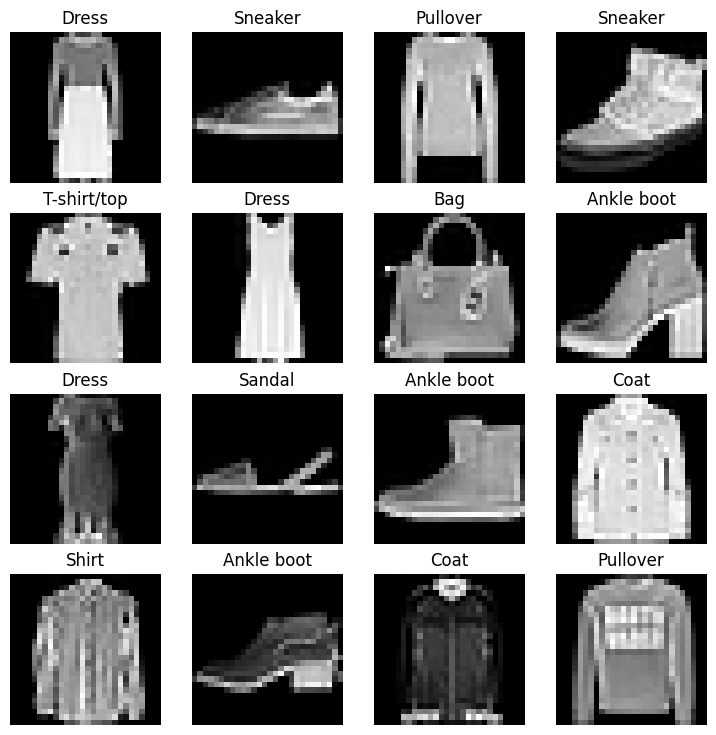

In [45]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


## 2. Prepare DataLoader
* DataLoader: turn our dataset in to a python iterable 
* turn our data to batches or mini batches

In [50]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False) 
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f11698a1100>,
 <torch.utils.data.dataloader.DataLoader at 0x7f11698a1af0>)

In [51]:
# Let's check out what we've created
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}...")


DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7f11698a1100>, <torch.utils.data.dataloader.DataLoader object at 0x7f11698a1af0>)
Length of train_dataLoader: 1875 batches of 32...
Length of test_dataLoader: 313 batches of 32...


In [52]:
# Check out what 's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) 
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [53]:
len(train_features_batch)

32

Image size: torch.Size([1, 28, 28])
Label: 3 and Label size: torch.Size([])


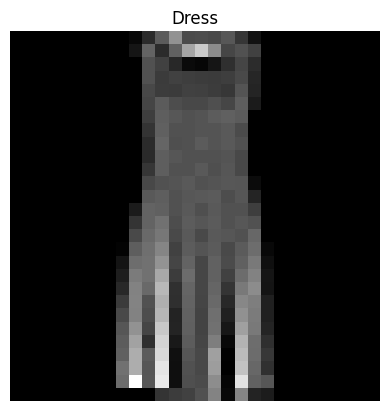

In [57]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label} and Label size: {label.shape}")